In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle
import CommonFunction as cf
from LDAFunction import LDAFunction
from IPython.display import display, Image

(210, 14)


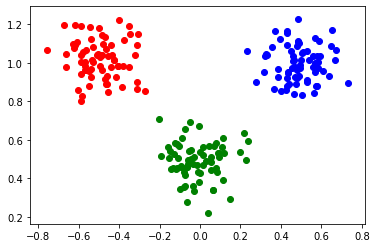

In [2]:
Nsample = 210
sampleNoise = 0.1
Nclass = 3
centers = [
    [-0.5, 1],
    [0, 0.5],
    [0.5, 1],
]
subSamples = int(Nsample/3)

X, t = skdata.make_blobs(n_samples = [subSamples, subSamples, subSamples], 
                         cluster_std = sampleNoise, random_state = 0, shuffle = False, centers = centers)

plt.scatter(X[:subSamples, 0], X[:subSamples, 1], c = 'r', label = "class0")
plt.scatter(X[subSamples:subSamples*2, 0], X[subSamples:subSamples*2, 1], c = 'g', label = "class1")
plt.scatter(X[subSamples*2:, 0], X[subSamples*2:, 1], c = 'b', label = "class2")

t = t.reshape(-1,1)

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
    lambda x: np.power(x[:, 0], 4),
    lambda x: np.power(x[:, 1], 4),
]

Xfeatures = cf.CommonFunction(X, funcs).generate()
print(Xfeatures.shape)

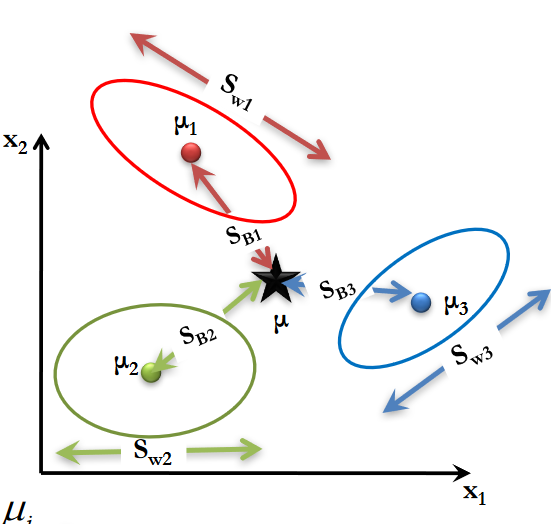

In [3]:
display(Image(filename='LDA.png'))

In [4]:
n_components = 10

lda = LDAFunction(n_components)
X_out = lda.fit_transform(Xfeatures)
print("X_out:",X_out.shape)

X0: (70, 14)
X1: (70, 14)
X2: (70, 14)
X_out: (210, 10)
